#I-clustering des données synthétiques via K-means

3)

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
blob_centers= np.array(
[[ 0.2, 2.3],
[-1.5 , 2.3],
[-2.8, 1.8],
[-2.8, 2.8],
[-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# "datas" représente les données et "indice" représente les indices de clusters réels

datas, indice = make_blobs(n_samples=2000, centers=blob_centers,
cluster_std=blob_std, random_state=7)

4)

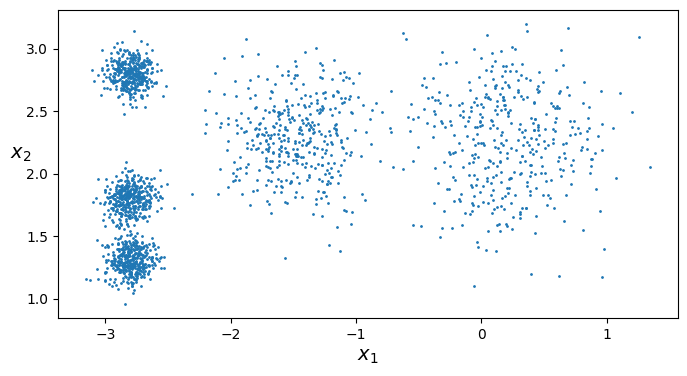

In [2]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(datas)
plt.show()

5)

In [3]:
import sklearn as sk #importation de sklearn

model=sk.cluster.KMeans(5) #importation du modèle KMeans

6)

In [4]:
RenaitLaTaupe=model.fit_predict(datas) #entrainement des données
print(RenaitLaTaupe)

[4 2 1 ... 3 1 2]


7)

In [5]:
Nami=sk.metrics.normalized_mutual_info_score(indice,RenaitLaTaupe) #calcul du score NMI
print(Nami)#On a un score assez élevé ce qui signifit que les clusters sont très similaires mais pas totalement identiques

0.9676600730451858


8)

[[-1.46679593  2.28585348]
 [ 0.20876306  2.25551336]
 [-2.80389616  1.80117999]
 [-2.79290307  2.79641063]
 [-2.80037642  1.30082566]]


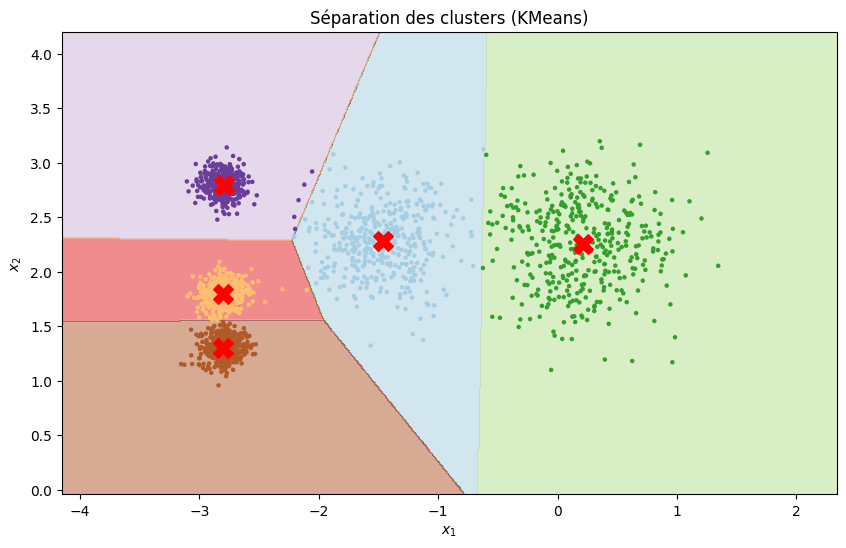

In [6]:
centroides=model.cluster_centers_ #calcul des abscisse et des ordonnées des centroides
print(centroides)

# Tracé de la séparation des clusters
def graph_cluster_separer(kmeans, X, resolution=0.01):
    # Limites du graphe
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    '''
    X[:, 0] correspond à la première dimension des données (axe x)
    X[:, 1] correspond à la deuxième dimension des données(axe y)


    np.meshgrid génère une grille 2D couvrant tout l'espace défini par x_min, x_max, y_min, et y_max.
    '''
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Prédictions pour chaque point de la grille
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel transforme une matrice en vecteur 1 dimension
    Z = Z.reshape(xx.shape)

    # Tracé des régions
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=5, cmap=plt.cm.Paired)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=200, c='red', marker='X')  # Centroïdes
    plt.title("Séparation des clusters (KMeans)")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

plt.figure(figsize=(10, 6))
graph_cluster_separer(model, datas)

9)

In [7]:
data_new = np.array([[-3, 2.5]])

papi=model.transform(data_new) #calcul la distance entre le points data_new et chacun des centroïdes
print(papi) #le centroïde le plus proche de data_New est le troisième cluster

mami=model.predict(data_new)
print(mami)

[[1.54808703 3.21806371 0.72581411 0.36159148 1.21567622]]
[3]


Le cluster 3 a la distance la plus proche de data_new. L'indice du cluster est 2, la prédiction est bonne.

#II-Clustering des images faciales via K-means

11)

In [8]:
ItalienLa=sk.datasets.fetch_olivetti_faces() #importation de la base fetch_olivetti_faces
#print(ItalienLa)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


12)

In [9]:
dezcripzion=ItalienLa.DESCR
print(dezcripzion) #on a 40 classes et 400 photos differentes

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

13)

In [10]:
targettaa=ItalienLa.target #affichage des indices de cluster
print(targettaa)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

14)

In [11]:
Datta=ItalienLa.data #Affichez des données de cette base de données
print(Datta)

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


15)

In [12]:
train_christiano,reste_a_separer,train_targettaa,reste_targettaa=sk.model_selection.train_test_split(Datta,targettaa ,test_size=0.40,train_size=0.60) #Répartition des données (60% pour l'entrainement et 40% pour le reste)
print(len(train_christiano)) #on a bien 60 % des données
print(len(train_targettaa)) #on a bien 40 % des données
# print(len(reste_a_separer))

test_christiano,validation_christiano,test_targettaa,validation_targettaa=sk.model_selection.train_test_split(reste_a_separer,reste_targettaa ,test_size=0.50,train_size=0.50)#Répartition des données (50% pour le test et 50 % pour la validation)
print(len(test_christiano)) #on a bien 20 % des données
print(len(validation_christiano))
print(len(test_targettaa))#on a bien 20 % des données
print(len(validation_targettaa))

240
240
80
80
80
80


16)

In [13]:
SUII=sk.cluster.KMeans(40)#application de la méthode kmeans pour n=40 clusters

RONALDO=SUII.fit(train_christiano)
print(RONALDO)

KMeans(n_clusters=40)


17)

In [14]:
PEPE=SUII.predict(validation_christiano) #prediction des indices de cluster des données de validation
print(PEPE)

[17 34  7 39 19  0  3 31 13 13  1  1 26  3 26  2  2  7 24 10 30  2 32 21
  2 28  2 26 33 39  2 30 26 30 26  8 33 33 25  2 25 10 30  4  2 19 31 30
  1  8  4 32 37 31  8 19 21  7 25 30 26 31  7  4 10 10 10 13  2 11 30 33
 37  3 22  4 32  6 34 26]


18)

In [15]:
Robin=sk.metrics.normalized_mutual_info_score(validation_targettaa,PEPE) #calcul du NMI du modèla
print(Robin)

0.8291451364339685


19)

Cluster 0


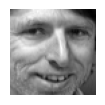

Cluster 1


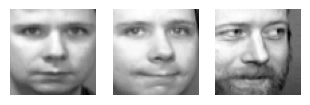

Cluster 2


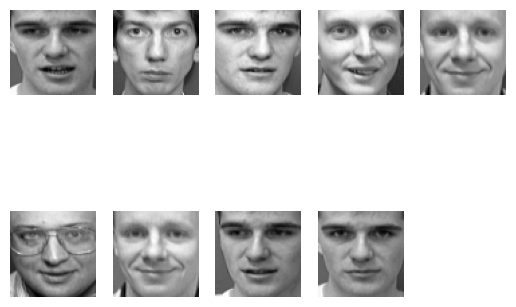

Cluster 3


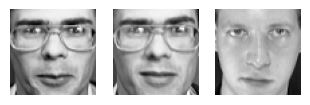

Cluster 4


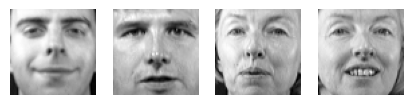

Cluster 6


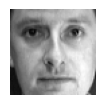

Cluster 7


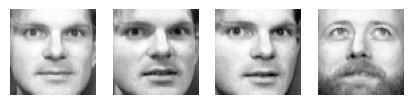

Cluster 8


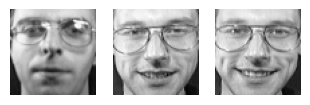

Cluster 10


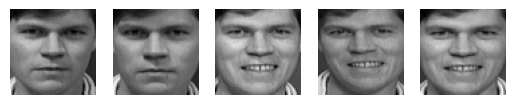

Cluster 11


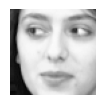

Cluster 13


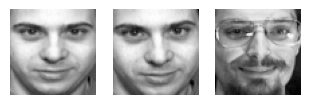

Cluster 17


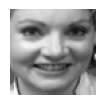

Cluster 19


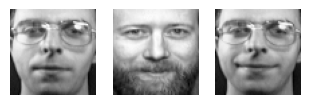

Cluster 21


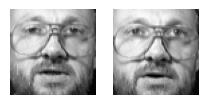

Cluster 22


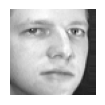

Cluster 24


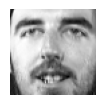

Cluster 25


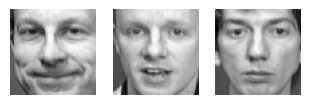

Cluster 26


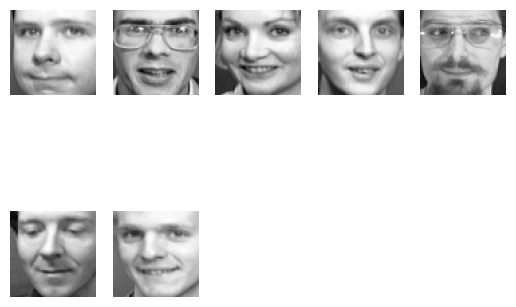

Cluster 28


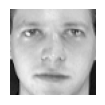

Cluster 30


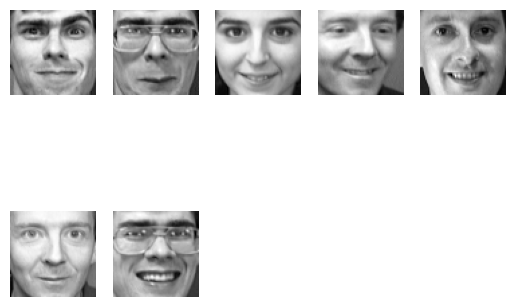

Cluster 31


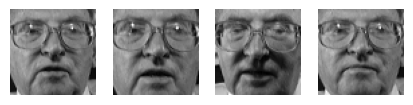

Cluster 32


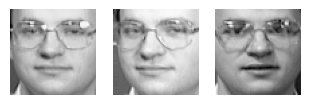

Cluster 33


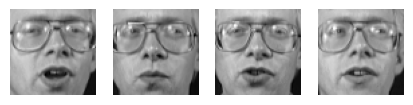

Cluster 34


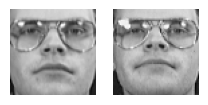

Cluster 37


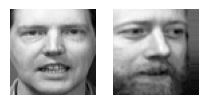

Cluster 39


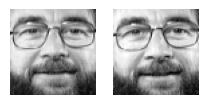

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_faces(faces,n_cols=5):
  n_rows=(len(faces)-1)//n_cols+1
  #plt.figure(figsize=(n_cols, n_rows*1.1))
  for index in range(0, len(faces)):
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(faces[index].reshape(64,64),cmap="gray")
    plt.axis("off")
  plt.show()

for cluster_id in np.unique(PEPE):
    print("Cluster", cluster_id)
    in_cluster = PEPE == cluster_id
    faces = validation_christiano[in_cluster].reshape(-1, 64, 64)
    plot_faces(faces)
